**Callback in DeepLearning is a function or set of functions that are automatically executed during training at specific stages. For e.g. before or after an epoch or before or after a batch, etc.**

Call back helps in monitoring optimizing and controlling the training process without manual intervention. Common callbacks in tensorflow or keras are
1. Early stopping - It stops training if the validation_loss doesn't improve.
2. Model Checkpoint saves the best model automatically.

***HDF5 is Hierarchical data format 5. This versatile format is used by various libraries and can store entire model including architecture, learned parameters and even additional data used during training.***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels reshaped for one-hot encoding

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define a simple deep learning model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for the Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop if validation loss doesn't improve
    patience=5,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

model_checkpoint = ModelCheckpoint(
    filepath='best_iris_model.h5',  # Save the best model
    monitor='val_loss',
    save_best_only=True
)

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate the model on validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
 8/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0823 - loss: 1.3963 

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.0792 - loss: 1.3806 - val_accuracy: 0.1000 - val_loss: 1.3123
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.1250 - loss: 1.2944

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1001 - loss: 1.2826 - val_accuracy: 0.1000 - val_loss: 1.2302
Epoch 3/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2500 - loss: 1.2286

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2122 - loss: 1.2124 - val_accuracy: 0.2667 - val_loss: 1.1659
Epoch 4/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3750 - loss: 1.1446

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2852 - loss: 1.1499 - val_accuracy: 0.3333 - val_loss: 1.1126
Epoch 5/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 1.1322

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3361 - loss: 1.1211 - val_accuracy: 0.4000 - val_loss: 1.0783
Epoch 6/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.2500 - loss: 1.1004

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3991 - loss: 1.0854 - val_accuracy: 0.4333 - val_loss: 1.0522
Epoch 7/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6250 - loss: 1.0280

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4426 - loss: 1.0519 - val_accuracy: 0.5333 - val_loss: 1.0301
Epoch 8/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 1.0637

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5062 - loss: 1.0386 - val_accuracy: 0.6667 - val_loss: 1.0072
Epoch 9/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 1.0180

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5621 - loss: 1.0119 - val_accuracy: 0.7333 - val_loss: 0.9786
Epoch 10/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7500 - loss: 0.9799

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7046 - loss: 0.9811 - val_accuracy: 0.7667 - val_loss: 0.9428
Epoch 11/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.9551

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.9486 - val_accuracy: 0.7667 - val_loss: 0.8965
Epoch 12/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.9914

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7094 - loss: 0.8974 - val_accuracy: 0.8333 - val_loss: 0.8333
Epoch 13/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8198

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7863 - loss: 0.8269 - val_accuracy: 0.9000 - val_loss: 0.7645
Epoch 14/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6250 - loss: 0.8088

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7796 - loss: 0.7730 - val_accuracy: 0.9000 - val_loss: 0.6977
Epoch 15/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.7356

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8275 - loss: 0.7165 - val_accuracy: 0.9000 - val_loss: 0.6330
Epoch 16/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.5521

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8591 - loss: 0.6154 - val_accuracy: 0.8667 - val_loss: 0.5741
Epoch 17/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.6220

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7951 - loss: 0.6102 - val_accuracy: 0.9000 - val_loss: 0.5240
Epoch 18/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6250 - loss: 0.6724

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7889 - loss: 0.5594 - val_accuracy: 0.9000 - val_loss: 0.4803
Epoch 19/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7500 - loss: 0.5215

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7938 - loss: 0.5175 - val_accuracy: 0.9000 - val_loss: 0.4441
Epoch 20/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 0.5924

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7540 - loss: 0.5003 - val_accuracy: 0.9000 - val_loss: 0.4138
Epoch 21/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 1.0000 - loss: 0.3136

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8610 - loss: 0.4297 - val_accuracy: 0.9000 - val_loss: 0.3875
Epoch 22/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.4885

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7992 - loss: 0.4423 - val_accuracy: 0.9000 - val_loss: 0.3652
Epoch 23/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.7500 - loss: 0.4845

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8250 - loss: 0.4284 - val_accuracy: 0.9000 - val_loss: 0.3471
Epoch 24/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.8750 - loss: 0.3770

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8569 - loss: 0.3989 - val_accuracy: 0.9000 - val_loss: 0.3302
Epoch 25/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.8750 - loss: 0.3220

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.4035 - val_accuracy: 0.9000 - val_loss: 0.3147
Epoch 26/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.8750 - loss: 0.3413

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8660 - loss: 0.3496 - val_accuracy: 0.9000 - val_loss: 0.3018
Epoch 27/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6250 - loss: 0.5474

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8148 - loss: 0.4149 - val_accuracy: 0.9000 - val_loss: 0.2903
Epoch 28/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8750 - loss: 0.4100

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8552 - loss: 0.3629 - val_accuracy: 0.9333 - val_loss: 0.2782
Epoch 29/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.3981

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8700 - loss: 0.3382 - val_accuracy: 0.9333 - val_loss: 0.2678
Epoch 30/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 1.0000 - loss: 0.2659

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8814 - loss: 0.3225 - val_accuracy: 0.9000 - val_loss: 0.2602
Epoch 31/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8750 - loss: 0.3192

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8892 - loss: 0.3098 - val_accuracy: 0.9333 - val_loss: 0.2498
Epoch 32/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8750 - loss: 0.2660

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9026 - loss: 0.2750 - val_accuracy: 0.9333 - val_loss: 0.2412
Epoch 33/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.2879

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8940 - loss: 0.3187 - val_accuracy: 0.9333 - val_loss: 0.2322
Epoch 34/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.2992

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9385 - loss: 0.2654 - val_accuracy: 0.9333 - val_loss: 0.2243
Epoch 35/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.2738

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9225 - loss: 0.2749 - val_accuracy: 0.9333 - val_loss: 0.2162
Epoch 36/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.3717

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8775 - loss: 0.3034 - val_accuracy: 0.9333 - val_loss: 0.2088
Epoch 37/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2137

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9006 - loss: 0.2854 - val_accuracy: 0.9333 - val_loss: 0.2027
Epoch 38/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 1.0000 - loss: 0.2499

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9266 - loss: 0.2478 - val_accuracy: 0.9333 - val_loss: 0.1956
Epoch 39/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.1534

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9199 - loss: 0.2294 - val_accuracy: 0.9333 - val_loss: 0.1880
Epoch 40/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 0.2502

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 0.2414 - val_accuracy: 0.9333 - val_loss: 0.1861
Epoch 41/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.1215

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9442 - loss: 0.1932 - val_accuracy: 0.9667 - val_loss: 0.1769
Epoch 42/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0644

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9140 - loss: 0.2424 - val_accuracy: 0.9667 - val_loss: 0.1716
Epoch 43/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.1138

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9361 - loss: 0.1971 - val_accuracy: 0.9667 - val_loss: 0.1666
Epoch 44/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1097

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9086 - loss: 0.2165 - val_accuracy: 1.0000 - val_loss: 0.1617
Epoch 45/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8750 - loss: 0.3006

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9155 - loss: 0.2255 - val_accuracy: 1.0000 - val_loss: 0.1536
Epoch 46/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1987

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9498 - loss: 0.2014 - val_accuracy: 1.0000 - val_loss: 0.1476
Epoch 47/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0202

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9447 - loss: 0.1651 - val_accuracy: 1.0000 - val_loss: 0.1421
Epoch 48/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8750 - loss: 0.2359

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9184 - loss: 0.2012 - val_accuracy: 1.0000 - val_loss: 0.1339
Epoch 49/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.1551

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9447 - loss: 0.1715 - val_accuracy: 1.0000 - val_loss: 0.1253
Epoch 50/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8750 - loss: 0.2719

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9154 - loss: 0.2013 - val_accuracy: 1.0000 - val_loss: 0.1209
Epoch 51/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8750 - loss: 0.2819

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9231 - loss: 0.2075 - val_accuracy: 1.0000 - val_loss: 0.1153
Epoch 52/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9260 - loss: 0.1788 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9275 - loss: 0.1778 - val_accuracy: 1.0000 - val_loss: 0.1125
Epoch 53/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 1.0000 - loss: 0.1168

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9617 - loss: 0.1402 - val_accuracy: 1.0000 - val_loss: 0.1043
Epoch 54/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1883

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9516 - loss: 0.1470 - val_accuracy: 1.0000 - val_loss: 0.1038
Epoch 55/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.1596

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9773 - loss: 0.1354 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 56/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 1.0000 - loss: 0.0158

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9626 - loss: 0.1048 - val_accuracy: 1.0000 - val_loss: 0.0929
Epoch 57/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 1.0000 - loss: 0.0527

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9589 - loss: 0.1321 - val_accuracy: 1.0000 - val_loss: 0.0894
Epoch 58/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 1.0000 - loss: 0.0143

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9711 - loss: 0.1075 - val_accuracy: 1.0000 - val_loss: 0.0878
Epoch 59/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.1992

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9731 - loss: 0.1271 - val_accuracy: 1.0000 - val_loss: 0.0810
Epoch 60/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0672

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9887 - loss: 0.0870 - val_accuracy: 1.0000 - val_loss: 0.0759
Epoch 61/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9286 - loss: 0.1330 - val_accuracy: 1.0000 - val_loss: 0.0794
Epoch 62/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.1149

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9676 - loss: 0.1184 - val_accuracy: 1.0000 - val_loss: 0.0724
Epoch 63/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9477 - loss: 0.1119 - val_accuracy: 1.0000 - val_loss: 0.0743
Epoch 64/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8750 - loss: 0.1868

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9140 - loss: 0.1400 - val_accuracy: 1.0000 - val_loss: 0.0707
Epoch 65/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.3011

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9384 - loss: 0.1180 - val_accuracy: 1.0000 - val_loss: 0.0673
Epoch 66/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9599 - loss: 0.0809 - val_accuracy: 0.9667 - val_loss: 0.0688
Epoch 67/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.2378

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9560 - loss: 0.1108 - val_accuracy: 1.0000 - val_loss: 0.0661
Epoch 68/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.2914

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9130 - loss: 0.1381 - val_accuracy: 1.0000 - val_loss: 0.0645
Epoch 69/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9681 - loss: 0.0718 - val_accuracy: 0.9667 - val_loss: 0.0667
Epoch 70/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0225

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9622 - loss: 0.0797 - val_accuracy: 1.0000 - val_loss: 0.0606
Epoch 71/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9478 - loss: 0.0930 - val_accuracy: 0.9667 - val_loss: 0.0620
Epoch 72/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0109

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9807 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0587
Epoch 73/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9454 - loss: 0.0927 - val_accuracy: 0.9667 - val_loss: 0.0620
Epoch 74/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8750 - loss: 0.1679

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9435 - loss: 0.0929 - val_accuracy: 0.9667 - val_loss: 0.0586
Epoch 75/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.3324

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9359 - loss: 0.1133 - val_accuracy: 0.9667 - val_loss: 0.0583
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 0.0649 - val_accuracy: 0.9667 - val_loss: 0.0595
Epoch 77/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0578

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9448 - loss: 0.0866 - val_accuracy: 0.9667 - val_loss: 0.0571
Epoch 78/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0928

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9789 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.0529
Epoch 79/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9715 - loss: 0.0716 - val_accuracy: 0.9667 - val_loss: 0.0551
Epoch 80/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.0795 - val_accuracy: 0.9667 - val_loss: 0.0580
Epoch 81/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9476 - loss: 0.0897 - val_accuracy: 0.9667 - val_loss: 0.0584
Epoch 82/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0140

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9529 - loss: 0.0840 - val_accuracy: 1.0000 - val_loss: 0.0521
Epoch 83/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9718 - loss: 0.0794 - val_accuracy: 0.9667 - val_loss: 0.0537
Epoch 84/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9711 - loss: 0.0687 - val_accuracy: 0.9667 - val_loss: 0.0532
Epoch 85/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0049

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9880 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0498
Epoch 86/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9916 - loss: 0.0460 - val_accuracy: 1.0000 - val_loss: 0.0500
Epoch 87/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.0610 - val_accuracy: 0.9667 - val_loss: 0.0521
Epoch 88/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9638 - loss: 0.0818 - val_accuracy: 0.9667 - val_loss: 0.0501
Epoch 89/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9782 - loss: 0.0566 - val_accuracy: 0.9667 - val_loss: 0.0500
Epoch 90/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0592

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9789 - loss: 0.0651 - val_accuracy: 1.0000 - val_loss: 0.0465
Epoch 91/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0089

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9760 - loss: 0.0621 - val_accuracy: 1.0000 - val_loss: 0.0463
Epoch 92/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9467 - loss: 0.0968 - val_accuracy: 0.9667 - val_loss: 0.0511
Epoch 93/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9841 - loss: 0.0535 - val_accuracy: 0.9667 - val_loss: 0.0500
Epoch 94/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9782 - loss: 0.0679 - val_accuracy: 0.9667 - val_loss: 0.0479
Epoch 95/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9487 - loss: 0.0961 - val_accuracy: 0.9667 - val_loss: 0.0477
Epoch 96/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9894 - loss: 0.0594 - val_accuracy: 0.9667 - val_loss: 0.0493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 1.0000 - loss: 0.0463
Validation Accuracy: 1.0000


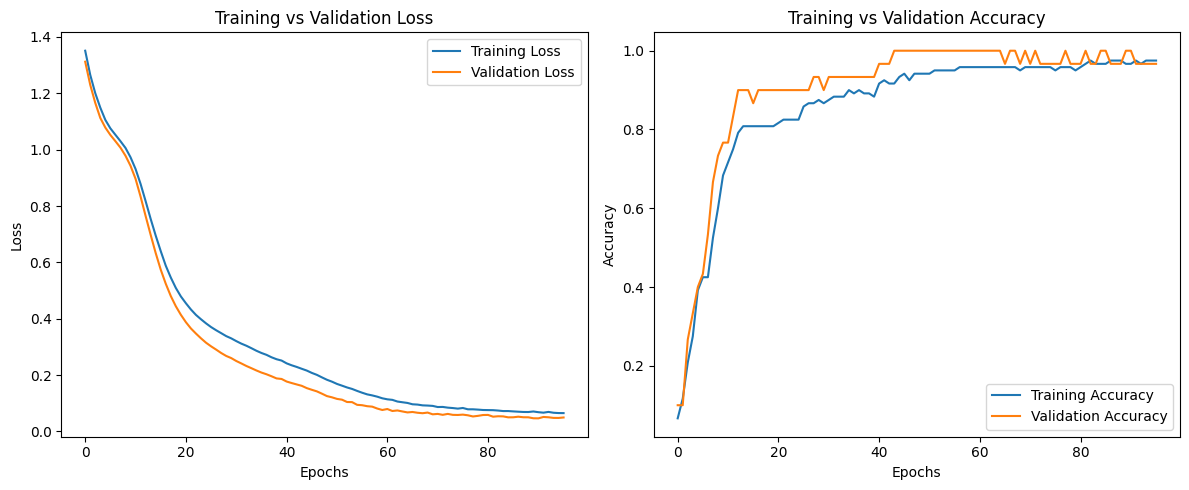

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


***Loss is a continuous function that updates smoothly over epochs making its curve appear smooth whereas accuracy is a step wise metric meaning it only improves when a predicted class label changes from incorrect to correct. This can cause the zig-zag pattern which we can reduce by increasing the batch size or monitoring the validation loss more than accuracy.***